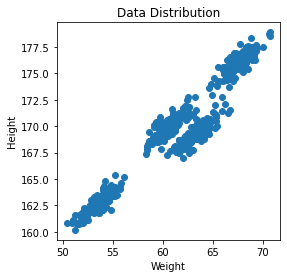

In [4]:
#Generating Data:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
X = pd.read_csv('Clustering_gmm.csv')
X=np.array(X)
plt.figure(figsize=(4,4))
plt.scatter(X[:,0],X[:,1])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Data Distribution')
plt.show()

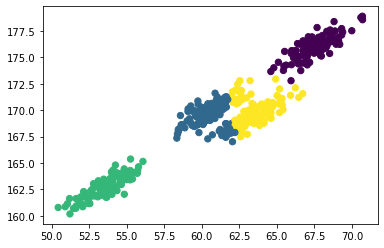

In [3]:
#Applying K-Means:
from sklearn.cluster import KMeans
kmm = KMeans(n_clusters=4)
kmm.fit(X)
labels = kmm.predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, s=40, cmap='viridis')
plt.show()

In [18]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:,0], X[:,1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

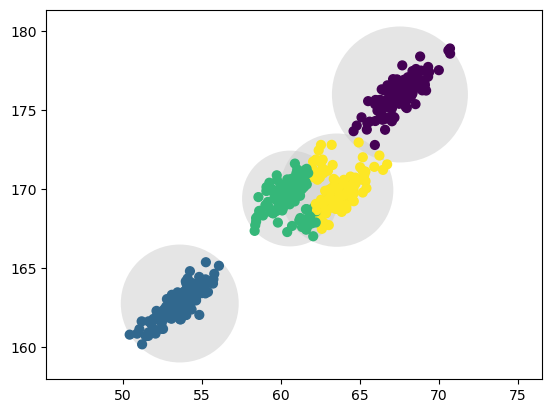

In [19]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)
plt.show()

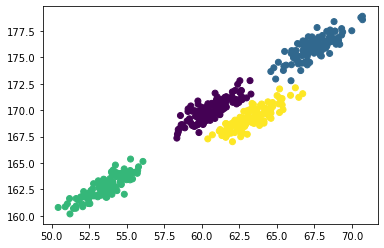

In [8]:
#GMM:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(X)
labels = gmm.predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.show()

In [9]:
gmm.means_

array([[ 60.65965331, 170.03408316],
       [ 67.50985394, 175.97078199],
       [ 53.60032207, 162.76480175],
       [ 63.29340653, 169.26192487]])

In [10]:
gmm.covariances_

array([[[1.31553487, 0.97514708],
        [0.97514708, 1.08387744]],

       [[1.30109731, 0.97830282],
        [0.97830282, 1.15566526]],

       [[1.24923216, 0.95686471],
        [0.95686471, 1.02835817]],

       [[1.56855087, 1.12091738],
        [1.12091738, 1.13465758]]])

In [11]:
gmm.weights_

array([0.25016717, 0.25115608, 0.25000038, 0.24867638])

In [24]:
#Predicting probability:
probs = gmm.predict_proba(X)
probs[0,:]
probs = probs.round(6)
print(probs)


[[0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00]
 [0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00]
 [9.99997e-01 0.00000e+00 0.00000e+00 3.00000e-06]
 ...
 [0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00]
 [9.99998e-01 0.00000e+00 0.00000e+00 2.00000e-06]]


In [25]:
#VIsualization Ellipse:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

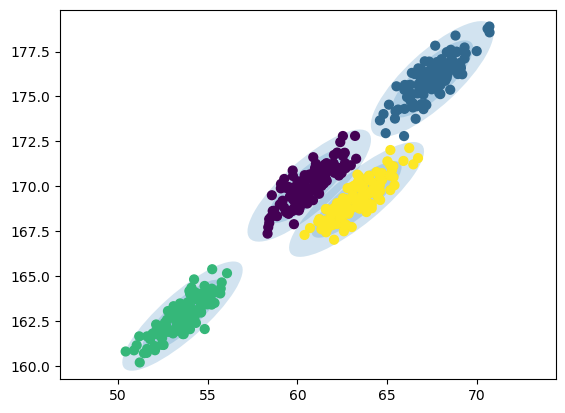

In [10]:
# For creating some circles around the center of each cluster within the visualizations
from scipy.spatial.distance import cdist
# For creating some circles for probability area around the center of each cluster within the visualizations
from matplotlib.patches import Ellipse
gmm = GaussianMixture(n_components=4)
plot_gmm(gmm, X)
plt.show()

In [11]:
#Looking for parameters:
gmm.means_

array([[ 60.65947314, 170.03409095],
       [ 67.51020913, 175.97148116],
       [ 53.60032214, 162.76480185],
       [ 63.29386164, 169.26275326]])

In [12]:
gmm.weights_

array([0.2501403 , 0.251102  , 0.25000039, 0.24875731])

In [13]:
gmm.covariances_

array([[[1.31518943, 0.9751153 ],
        [0.9751153 , 1.0838413 ]],

       [[1.30076982, 0.9773464 ],
        [0.9773464 , 1.15363323]],

       [[1.24923225, 0.95686485],
        [0.95686485, 1.02835839]],

       [[1.56977667, 1.12257526],
        [1.12257526, 1.13710942]]])

In [14]:
#AIC and BIC for determining Optimal K:
Sum_bic = []
Sum_aic = []

K = range(1,8)
for k in K:
    gmm = GaussianMixture(n_components=k)
    gmm = gmm.fit(X)
    Sum_bic.append(gmm.bic(X))
    Sum_aic.append(gmm.aic(X))

D:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


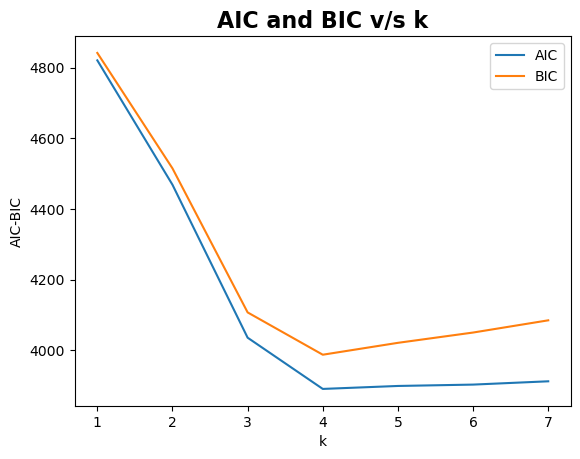

In [15]:
x1 = K
y1 = Sum_aic
plt.plot(x1, y1, label = "AIC")
x2 = K
y2 = Sum_bic
plt.plot(x2, y2, label = "BIC")

plt.title("AIC and BIC v/s k", fontsize=16, fontweight='bold')
plt.xlabel("k")
plt.ylabel("AIC-BIC")
plt.legend(loc='upper right')
plt.show()